<a href="https://colab.research.google.com/github/oliviachg/Disneyland-Reviews/blob/main/%5BOlivia%5D_Disneyland.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background

Dataset: https://www.kaggle.com/datasets/arushchillar/disneyland-reviews


**Problem Statement**
HMW improve Disneyland California's service points to elevate the customer experience?

**Objective**
Identifying key improvement areas to elevate Disneyland California's experience.
*(ID) mengetahui area pelayanan yang dapat diperbaiki pada Disneyland California*


**Scope Limitation**
- Disneyland California
- Using data for 1 last year (Q2-Q4 2018, Q1 2019)


**⁠Strategy**
•⁠  ⁠Find out trend for the last Q4 through data visualizations
•⁠  ⁠⁠Find out the overall sentiment through wordcloud visualization


**Data Overview**

##Dataset Mounting

In [ ]:
#https://drive.google.com/file/d/1DIJy7L5FFbL9kodWoc_EwOCBRaAOqz3E/view?usp=sharing"

!pip install gdown

import gdown
import pandas as pd

# Replace 'your_file_id' with the actual file ID from your Google Drive shareable link
file_id = '1DIJy7L5FFbL9kodWoc_EwOCBRaAOqz3E'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'Group9_DisneylandReviews.csv', quiet=False)

df = pd.read_csv('Group9_DisneylandReviews.csv', encoding='latin1')

Downloading...
From: https://drive.google.com/uc?id=1DIJy7L5FFbL9kodWoc_EwOCBRaAOqz3E
To: /content/Group9_DisneylandReviews.csv
100%|██████████| 32.1M/32.1M [00:01<00:00, 18.1MB/s]


# Data Understanding

In [ ]:
df.shape

(42656, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [ ]:
df.columns

Index(['Review_ID', 'Rating', 'Year_Month', 'Reviewer_Location', 'Review_Text',
       'Branch'],
      dtype='object')

In [ ]:
# Display some first rows of the DataFrame
df.head(3)

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong


In [ ]:
df.tail(3)

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris
42655,1536786,4,missing,United Kingdom,"I went to the Disneyparis resort, in 1996, wit...",Disneyland_Paris


In [ ]:
df.sample(10)

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
26599,130880341,5,2012-4,United States,"Disneyland is awesome, plain and simple. Yes t...",Disneyland_California
35609,300743866,5,2015-8,United Kingdom,My first visit to Disneyland Paris was when it...,Disneyland_Paris
37910,218359660,5,2013-10,United States,Disneyland Paris' castle sure puts the origina...,Disneyland_Paris
38286,205422832,3,2014-4,Ireland,Eurodisney does in theory what it says on the ...,Disneyland_Paris
25329,147305519,5,2012-5,United States,When you feel like you've gotta grow DOWN a bu...,Disneyland_California
41046,132802938,4,2012-6,United Kingdom,Better for the younger kids but still a great ...,Disneyland_Paris
27657,123032029,5,2011-11,United States,Disneyland never disappoints! Get there at 8am...,Disneyland_California
40080,153544392,3,2013-2,United Kingdom,We spent 4 days at Disney. We spent the Thursd...,Disneyland_Paris
17575,313104492,5,2015-9,United States,I love Disneyland. What's not to love? It brin...,Disneyland_California
29152,661083229,4,2019-1,United Kingdom,We came here in January for a 3 day break.This...,Disneyland_Paris


# Data Preparation

In [ ]:
# Count the number of entries for each branch
branch_counts = df['Branch'].value_counts()

# Print the counts for each branch
print(branch_counts)

Disneyland_California    19406
Disneyland_Paris         13630
Disneyland_HongKong       9620
Name: Branch, dtype: int64


### Focusing on Disneyland California

In [ ]:
# Filter the DataFrame to include only data from the Disneyland California branch
df = df[df['Branch'] == 'Disneyland_California']

# Reset the index after filtering
df.reset_index(drop=True, inplace=True)

In [ ]:
#crosscheck
df.sample(10)

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
13346,186455655,3,2013-11,United States,Let's move past the fact that 7 major rides br...,Disneyland_California
9726,269367766,5,2015-4,United States,We arrived to the resort early to take advanta...,Disneyland_California
12702,201089129,5,2014-4,Austria,One of the best experiences I ever made! Disne...,Disneyland_California
2173,541686784,4,2017-11,Australia,My daughter and I were revisiting the USA and ...,Disneyland_California
1801,559581599,4,2018-2,United States,Used the unofficial guide to Disneyland and sa...,Disneyland_California
13377,185739307,5,2013-11,United States,"Even cold and a bit wet, we were welcomed ever...",Disneyland_California
4307,439819501,5,2016-11,France,Having only real been to Disneyland Paris I wa...,Disneyland_California
10928,238180924,5,2014-7,Australia,I dreamed of going to Disneyland (what kid doe...,Disneyland_California
1843,556870159,4,2018-1,United States,The park itself is excellent. Well staffed and...,Disneyland_California
15311,152250847,5,2012-12,United States,"Classic Disney experience all the fun, rides...",Disneyland_California


## Checking Data Types

In [ ]:
#Checking Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19406 entries, 0 to 19405
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          19406 non-null  int64 
 1   Rating             19406 non-null  int64 
 2   Year_Month         19406 non-null  object
 3   Reviewer_Location  19406 non-null  object
 4   Review_Text        19406 non-null  object
 5   Branch             19406 non-null  object
dtypes: int64(2), object(4)
memory usage: 909.8+ KB


In [ ]:
#Checking uniqueness on each column
df.nunique(axis=0)

Review_ID            19400
Rating                   5
Year_Month             111
Reviewer_Location      111
Review_Text          19399
Branch                   1
dtype: int64

In [ ]:
#checking empty rows
df.isna().sum()

Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
dtype: int64

***Insights:***
* **Review_ID** : some IDs are duplicates
- **Review ID** still as numbers → change to object
* **Rating** : 5 range
* **Year_Month** : got 1204 'missing'
* **Year_Month** : need to replace 'missing' with mode Y-m (maybe per group Branch?)
- **Year_Month** → change to datetime
* **Review_Text** : 1 same review? 19,399/19,400 exclusivity

###Review_ID

In [ ]:
#Review_ID supposed to be object
df['Review_ID'] = df['Review_ID'].astype(object)

In [ ]:
#There are 6 duplicates (19406 non-null object but only 19400 unique values)

#dropping the 6 duplicates as it is quant insignificant
df.drop_duplicates(subset=['Review_ID'], keep='first', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19400 entries, 0 to 19405
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          19400 non-null  object
 1   Rating             19400 non-null  int64 
 2   Year_Month         19400 non-null  object
 3   Reviewer_Location  19400 non-null  object
 4   Review_Text        19400 non-null  object
 5   Branch             19400 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.0+ MB


###Year_Month

In [ ]:
#df['Year_Month'].value_counts()

In [ ]:
# Convert "Year_Month" column to datetime
df['Year_Month'] = pd.to_datetime(df['Year_Month'], errors='coerce')
# coercing means the missing values are represented as NaN, not the string 'missing' anymore

# Count NaN values in the 'Year_Month' column
nan_count = df['Year_Month'].isna().sum()

# Display the count of NaN values
print("Number of NaN values in 'Year_Month' column:", nan_count)

Number of NaN values in 'Year_Month' column: 1204


**Insight:** ~6% NaN values
let's try to fill these with Mode

**Notes:**
as we're *analyzing patterns or trends across different months or years as distinct categories,
treating 'Year_Month' as categorical and using the mode to replace missing values *

In [ ]:
# Find the mode (most common year) of the "Year_Month" column
mode_year = int(df['Year_Month'].dt.year.mode()[0])

print(mode_year)

2015


In [ ]:
# Replace missing values in "Year_Month" column with the mode
df['Year_Month'].fillna(pd.to_datetime(f"{mode_year}-01"), inplace=True)

# Display the DataFrame after replacing missing values
df.sample(5)

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
616,625038916,4,2018-10-01,United States,Somewhat overpriced due to large crowd and tim...,Disneyland_California
16729,133809401,5,2012-06-01,Australia,Disneyland boasts the reputation for being the...,Disneyland_California
13911,175632001,5,2013-08-01,United States,This was my first visit as an adult to Disneyl...,Disneyland_California
4089,448945584,5,2017-01-01,United States,We came here 2 years ago. It's a special place...,Disneyland_California
2190,540533591,3,2017-10-01,United States,I had been to Disney 30 years ago and that was...,Disneyland_California


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19400 entries, 0 to 19405
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Review_ID          19400 non-null  object        
 1   Rating             19400 non-null  int64         
 2   Year_Month         19400 non-null  datetime64[ns]
 3   Reviewer_Location  19400 non-null  object        
 4   Review_Text        19400 non-null  object        
 5   Branch             19400 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.0+ MB


In [ ]:
df.isna().sum()

Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
dtype: int64

In [ ]:
#Find out year range from the whole dataset
start_year = df['Year_Month'].min()
end_year = df['Year_Month'].max()

print(start_year)
print(end_year)

2010-04-01 00:00:00
2019-05-01 00:00:00


In [ ]:
from datetime import datetime, timedelta

# Define the end date (2019-05-01)
end_date = datetime(2019, 5, 1)

# Calculate the start date (1 year ago from end date)
start_date = end_date - timedelta(days=365)

# Filter the dataset based on the date range
df_last1year = df[(df['Year_Month'] >= start_date) & (df['Year_Month'] <= end_date)]

# Display the filtered dataset
df_last1year.head(5)

# Filter the dataset to include only data from the year 2018-2019 as the most recent datapoint
#df_1819 = df[df['Year_Month'].dt.year >= 2018]

# Display the filtered dataset
#df_1819.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670801367,5,2019-04-01,United States,This place has always been and forever will be...,Disneyland_California
1,670760708,5,2019-04-01,United States,A great day of simple fun and thrills. Bring c...,Disneyland_California
2,670565072,4,2019-05-01,Australia,All and all a great day was had. The crowds ar...,Disneyland_California
3,670544335,5,2019-04-01,United States,Having been to the Florida location numerous t...,Disneyland_California
4,670472278,5,2019-04-01,Canada,"Had the 4 day pass, spent 3 at DL and one at C...",Disneyland_California


In [ ]:
#Find out year range from the whole dataset
start_year = df_last1year['Year_Month'].min()
end_year = df_last1year['Year_Month'].max()

print(start_year)
print(end_year)

2018-05-01 00:00:00
2019-05-01 00:00:00


In [ ]:
df_last1year.shape

(1269, 6)

In [ ]:
df_last1year['Year_Month'].value_counts()

2018-07-01    181
2018-06-01    151
2018-08-01    137
2018-05-01    136
2018-10-01    104
2018-09-01     98
2018-12-01     90
2019-03-01     88
2019-01-01     81
2018-11-01     80
2019-02-01     69
2019-04-01     53
2019-05-01      1
Name: Year_Month, dtype: int64

### Review_Text

In [ ]:
# Identify the unique values in the 'Review_Text' column
unique_values = df_last1year['Review_Text'].unique()

print(unique_values)

['This place has always been and forever will be special. The feeling you get entering the park, seeing the characters and different attractions is just priceless. This is definitely a dream trip for all ages, especially young kids. Spend the money and go to Disneyland, you will NOT regret it'
 "A great day of simple fun and thrills. Bring cash, nothing is cheap, but we knew that it's Disney. But they are great letting you bring in your own food, drinks, etc but read the list closely, we list several items at the entry gates (selfy sticks, glass refill bottles, etc). It is worth buying the photo pass and fastpass. Have fun! "
 "All and all a great day was had. The crowds are huge and ride times sometimes up to a 50 min wait but worth it. Very disappointed the castle was under repair and covered but we understood. If you want to take a short cut on the rides grab a Max Pass for 15 each it allows you to book a time every 90mins and believe me it's a great feeling floating past the ques. 

In [ ]:
# Find duplicate rows based on the 'Review_Text' column
duplicate_mask = df_last1year.duplicated(subset=['Review_Text'], keep=False)

# Locate the duplicate rows
duplicate_rows = df_last1year[duplicate_mask]

# Display the duplicate rows
print("Amount of Duplicate Rows:", duplicate_rows)

Amount of Duplicate Rows: Empty DataFrame
Columns: [Review_ID, Rating, Year_Month, Reviewer_Location, Review_Text, Branch]
Index: []


In [ ]:
#no empty lines
df_last1year.isna().sum()

Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
dtype: int64

In [ ]:
import nltk

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

import string
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.corpus import stopwords #untuk dapatin kata2 preposisi, conjunction, dll
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def get_wordnet_pos(pos_tag):
  if pos_tag.startswith("J"):
    return wordnet.ADJ
  elif pos_tag.startswith("V"):
    return wordnet.VERB
  elif pos_tag.startswith("N"):
    return wordnet.NOUN
  elif pos_tag.startswith("R"):
    return wordnet.ADV
  else:
    return wordnet.NOUN

#bikin function clean_text
def clean_text(text):
  #menyamaratakan besar kecilnya huruf
  text = text.lower()
  #memisahkan text jadi kata kata
  #for in --> untuk setiap WORD di TEXT.SPLIT, kita split dg spasi
  text = [word.strip(string.punctuation) for word in text.split(" ")]
  #menghapus stop word
  stop = stopwords.words('english')
  #mengecek setiap kata kedalam text apakah termasuk stop words
  text = [x for x in text if x not in stop]
  #menghapus kata yg tidak ada makna nya, function len(t) untuk tau panjang text
  text = [t for t in text if len(t) > 0]
  #menandai kata dengan kelas kata gramatikalnya
  pos_tags = pos_tag(text)
  #convert ke bentuk dasar kata, dimana t(0) artinya index pertama (tipe string)
  text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
  #menghapus kata yang mempunyai huruf kurang dari 1 karakter
  text = [t for t in text if len(t) > 1]
  #menggabungkan semua text jadi satu kesatuan string
  text = " ".join(text)
  return(text)

#lambda apply setiap data
#appy function clean_text yg sudah dibuat di atas
df["clean_review"] = df_last1year['Review_Text'].apply(lambda x: clean_text(x))

#manggil yang paing atas
df[["Review_Text","clean_review"]].sample(10)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,Review_Text,clean_review
14949,We went on a Wednesday. We got to the park ear...,NaN
7987,Definitely the Happiest place on Earth! The ch...,NaN
11480,It's difficult not to turn into a big kid when...,NaN
994,Bought Disney tickets at our Hotel and skipped...,buy disney ticket hotel skip line.park pretty ...
2160,We got there in time for rope drop. First time...,NaN
6616,Family group of 7 had a great time and loved e...,NaN
1221,"My last time to visit. To many people, very hi...",last time visit many people high cost attend 1...
11351,Can't tell you what I don't like about this pl...,NaN
4642,Always delivers!! Nothing like a great day of ...,NaN
9192,"This was my first visit to Disneyland, and I l...",NaN


# Filtering & Grouping

## Filter to last 4Qs

In [ ]:
df_last1year.shape

(1269, 6)

In [ ]:
df_last1year.columns

Index(['Review_ID', 'Rating', 'Year_Month', 'Reviewer_Location', 'Review_Text',
       'Branch'],
      dtype='object')

In [ ]:
# Remove the 'Branch' column from the DataFrame
df_nobranch = df_last1year.drop(columns=['Branch'])

# Display the DataFrame after removing the column
df_nobranch.head(5)


,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text
0,670801367,5,2019-04-01,United States,This place has always been and forever will be...
1,670760708,5,2019-04-01,United States,A great day of simple fun and thrills. Bring c...
2,670565072,4,2019-05-01,Australia,All and all a great day was had. The crowds ar...
3,670544335,5,2019-04-01,United States,Having been to the Florida location numerous t...
4,670472278,5,2019-04-01,Canada,"Had the 4 day pass, spent 3 at DL and one at C..."


In [ ]:
#Take only the last 4Qs

# Filter the dataset to include only Q2-Q4 2018, and Q1 2019
df = df_nobranch[(df_nobranch['Year_Month'] >= '2018-04-01') & (df_nobranch['Year_Month'] <= '2019-03-31')]

# Resample the filtered dataset to get the mean for each quarter
quarterly_mean = df.resample('Q', on='Year_Month').mean()

# Display the quarterly mean
quarterly_mean


,Rating
Year_Month,
2018-06-30,4.243902
2018-09-30,4.319712
2018-12-31,4.171533
2019-03-31,4.298319


## Grouping

## By Reviewer_Location

In [ ]:
#df.groupby("Reviewer_Location").size()

In [ ]:
# Group the dataset by 'Reviewer_Location' and count the number of reviews for each nationality
review_counts = df['Reviewer_Location'].value_counts()

# Get the top 10
top10_Reviewer_Location = review_counts.head(10)

# Display the top 10
print(top10_Reviewer_Location)


United States           724
Australia               158
Canada                  112
United Kingdom           94
New Zealand              29
Singapore                 9
India                     9
Germany                   6
Mexico                    6
United Arab Emirates      5
Name: Reviewer_Location, dtype: int64


## By Month

In [ ]:
df.size

6075

In [ ]:
df.groupby("Year_Month").size()

Year_Month
2018-05-01    136
2018-06-01    151
2018-07-01    181
2018-08-01    137
2018-09-01     98
2018-10-01    104
2018-11-01     80
2018-12-01     90
2019-01-01     81
2019-02-01     69
2019-03-01     88
dtype: int64

In [ ]:
df.resample("Y", on="Year_Month").mean()

,Rating
Year_Month,
2018-12-31,4.255885
2019-12-31,4.298319


In [ ]:
#Grouping per quartal
df.resample('Q', on="Year_Month").mean()

,Rating
Year_Month,
2018-06-30,4.243902
2018-09-30,4.319712
2018-12-31,4.171533
2019-03-31,4.298319


In [ ]:
#Grouping by month
df.resample("M", on="Year_Month").mean()

,Rating
Year_Month,
2018-05-31,4.117647
2018-06-30,4.357616
2018-07-31,4.320442
2018-08-31,4.335766
2018-09-30,4.295918
2018-10-31,3.951923
2018-11-30,4.362500
2018-12-31,4.255556
2019-01-31,4.209877


#Sentiment Analysis

# EDA

In [ ]:
import matplotlib.pyplot as plt

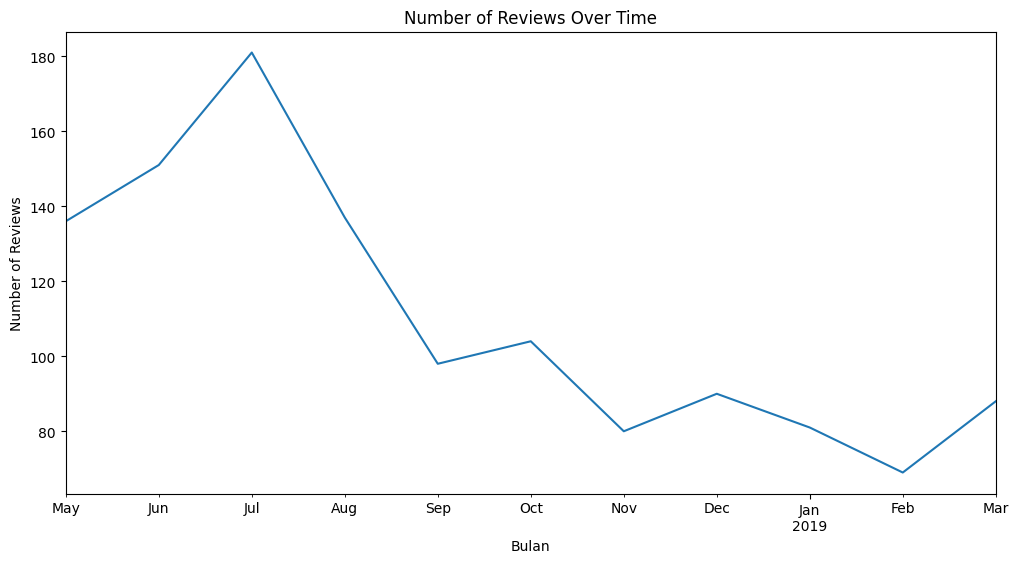

In [ ]:
tanggal_mulai = pd.to_datetime('2018-04-01')
tanggal_akhir = pd.to_datetime('2019-03-31')
data = df[(df['Year_Month'] >= tanggal_mulai) & (df['Year_Month'] <= tanggal_akhir)]

data['Year_Month'] = pd.to_datetime(data['Year_Month'], format='%Y-%m')

plt.figure(figsize=(12, 6))
data.set_index('Year_Month').resample('M')['Rating'].count().plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Bulan')
plt.ylabel('Number of Reviews')
plt.show()

In [ ]:
#wordcloud ing

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import requests
from io import BytesIO
import numpy as np

In [ ]:
wordcloud = WordCloud(
    background_color='white',
    max_words=200,
    scale=3,
    random_state=42,
    # stopwords=STOPWORDS
).generate(' '.join(list(df['clean_review'])))

wordcloud.to_image()

KeyError: 'clean_review'